In [386]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, RocCurveDisplay
import numpy as np
import plotly.graph_objects as go

## BIMCV Results

In [387]:
%cd ~

/clinicfs/userhomes/jaalzate


This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


In [430]:
figures_dir = 'Prostate_Cancer_TFM/Classification/Result_Figures'
extension = 'png'

In [431]:
# Read results from the json file
results_pretrained_path = 'Prostate_Cancer_TFM/Classification/logs/classification/Prostate/05-Jul-2024-10:48:50/results.json'
results_no_pretrained_path = 'Prostate_Cancer_TFM/Classification/logs/classification/Prostate/03-Jul-2024-08:55:54/results.json'

with open(results_pretrained_path) as f:
    pretrained_results = json.load(f)

with open(results_no_pretrained_path) as f:
    non_pretrained_results = json.load(f)


# Read original data
df = pd.read_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Unified_Derivatives.csv')

In [432]:
true_labels = df[df.partition=='val']['csPC'].values[:208]

pretrained_predictions = np.array(pretrained_results["Validation Predictions"])[:, 1]
non_pretrained_predictions = np.array(non_pretrained_results["Validation Predictions"])[:, 1]


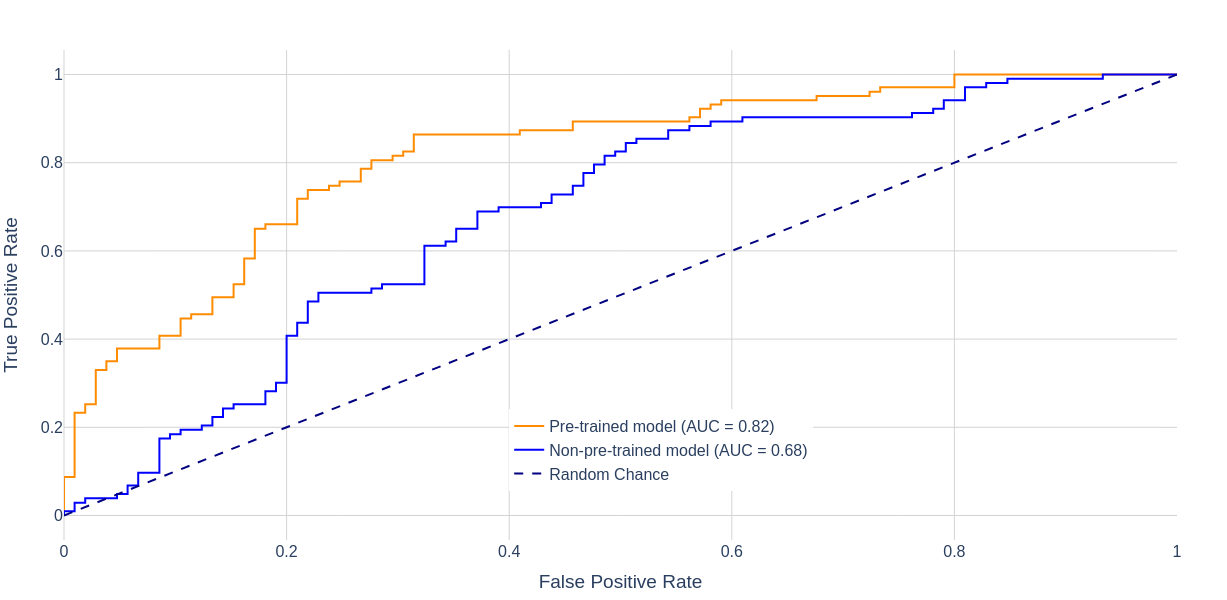

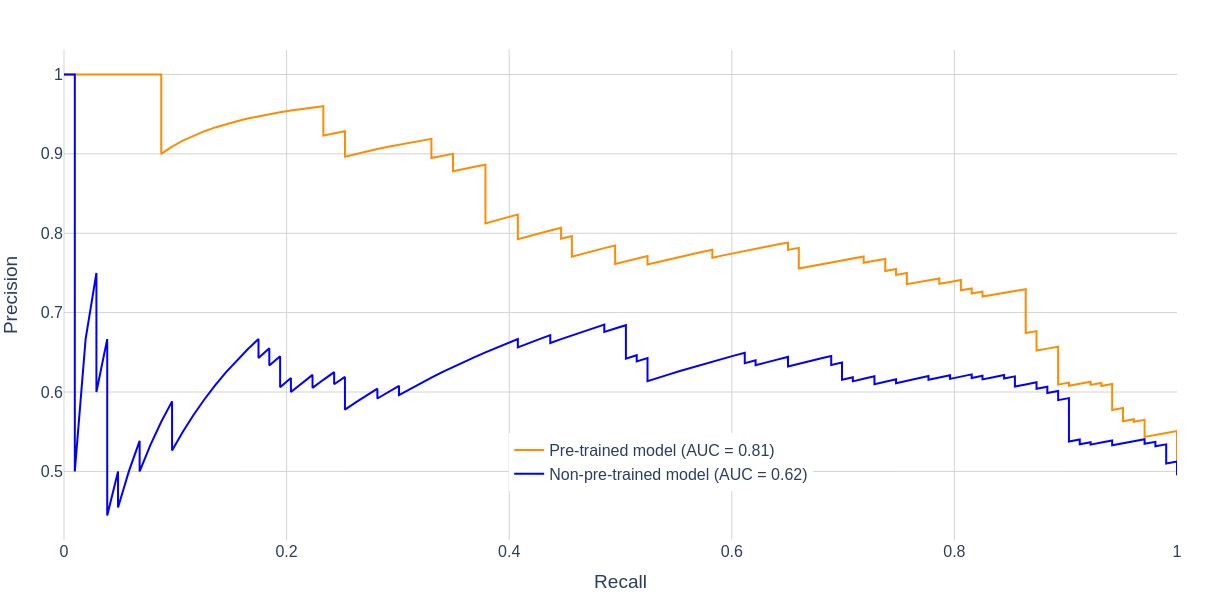

In [433]:
# Proceed with the analysis using the subset
pretrained_pred_labels = (pretrained_predictions > 0.5).astype(int)
non_pretrained_pred_labels = (non_pretrained_predictions > 0.5).astype(int)

# Classification reports
pretrained_class_report = classification_report(true_labels, pretrained_pred_labels, output_dict=True)
non_pretrained_class_report = classification_report(true_labels, non_pretrained_pred_labels, output_dict=True)

# Confusion matrices
pretrained_conf_matrix = confusion_matrix(true_labels, pretrained_pred_labels)
non_pretrained_conf_matrix = confusion_matrix(true_labels, non_pretrained_pred_labels)

# ROC curves
fpr_pretrained, tpr_pretrained, _ = roc_curve(true_labels, pretrained_predictions)
roc_auc_pretrained = auc(fpr_pretrained, tpr_pretrained)

fpr_non_pretrained, tpr_non_pretrained, _ = roc_curve(true_labels, non_pretrained_predictions)
roc_auc_non_pretrained = auc(fpr_non_pretrained, tpr_non_pretrained)

# Plot ROC curves
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_pretrained, y=tpr_pretrained,
    mode='lines', name=f'Pre-trained model (AUC = {roc_auc_pretrained:.2f})',
    line=dict(color='darkorange', width=2)
))

fig.add_trace(go.Scatter(
    x=fpr_non_pretrained, y=tpr_non_pretrained,
    mode='lines', name=f'Non-pre-trained model (AUC = {roc_auc_non_pretrained:.2f})',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines', name='Random Chance',
    line=dict(color='navy', width=2, dash='dash')
))

fig.update_layout(
    #title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.4, y=0.1),
    width=800, height=600,
    font=dict(size=16),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show()
fig.write_image(os.path.join(figures_dir,"AUC_ROC_BIMCV."+extension),scale=6)

# Generate precision-recall curves
precision_pretrained, recall_pretrained, _ = precision_recall_curve(true_labels, pretrained_predictions)
auc_precision_recall_pretrained = auc(recall_pretrained, precision_pretrained)

precision_non_pretrained, recall_non_pretrained, _ = precision_recall_curve(true_labels, non_pretrained_predictions)
auc_precision_recall_non_pretrained = auc(recall_non_pretrained, precision_non_pretrained)

# Create the precision-recall curve plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=recall_pretrained, y=precision_pretrained,
    mode='lines', name=f'Pre-trained model (AUC = {auc_precision_recall_pretrained:.2f})',
    line=dict(color='darkorange', width=2)
))

fig.add_trace(go.Scatter(
    x=recall_non_pretrained, y=precision_non_pretrained,
    mode='lines', name=f'Non-pre-trained model (AUC = {auc_precision_recall_non_pretrained:.2f})',
    line=dict(color='blue', width=2)
))

fig.update_layout(
    #title='Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    legend=dict(x=0.4, y=0.1),
    width=800, height=600,
    font=dict(size=16),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show()
fig.write_image(os.path.join(figures_dir,"Precision_Recall_BIMCV."+extension),scale=6)

In [392]:
# Convert classification report dictionaries to dataframes for better readability
pretrained_class_report_df = pd.DataFrame(pretrained_class_report).transpose()
non_pretrained_class_report_df = pd.DataFrame(non_pretrained_class_report).transpose()

# Display the classification reports
print("pre-trained model classification report:")
display(pretrained_class_report_df)

print("non-pre-trained model classification report:")
display(non_pretrained_class_report_df)

pre-trained model classification report:


,precision,recall,f1-score,support
0.0,0.795699,0.704762,0.747475,105.000000
1.0,0.730435,0.815534,0.770642,103.000000
accuracy,0.759615,0.759615,0.759615,0.759615
macro avg,0.763067,0.760148,0.759058,208.000000
weighted avg,0.763381,0.759615,0.758947,208.000000


non-pre-trained model classification report:


,precision,recall,f1-score,support
0.0,0.638889,0.657143,0.647887,105.000000
1.0,0.640000,0.621359,0.630542,103.000000
accuracy,0.639423,0.639423,0.639423,0.639423
macro avg,0.639444,0.639251,0.639215,208.000000
weighted avg,0.639439,0.639423,0.639298,208.000000


In [393]:
#print confusion matrices
print("pre-trained model confusion matrix:")
print(pretrained_conf_matrix)

print("non-pre-trained model confusion matrix:")
print(non_pretrained_conf_matrix)

pre-trained model confusion matrix:
[[74 31]
 [19 84]]
non-pre-trained model confusion matrix:
[[69 36]
 [39 64]]


## PICAI Results

In [394]:
df = pd.read_csv('Prostate_Cancer_TFM/Files/PICAI/partition_1_cv.csv')

In [395]:
# Path to the JSON file
json_path = 'Prostate_Cancer_TFM/Classification/logs/classification/Prostate_Picai/04-Jul-2024-09:19:41/cross_val_results.json'

# Load JSON data
with open(json_path) as f:
    cross_val_results = json.load(f)

# Extract test predictions and true labels
test_predictions = []
true_labels = []
for i, (fold, data) in enumerate(cross_val_results.items()):
    if 'Test Predictions' in data:
        test_predictions.append(np.array(data['Test Predictions'])[:, 1])
        true_labels.append(df[df[f"Fold {i}"] == 'test']['label'].values[:len(data['Test Predictions'])])

# Convert to numpy arrays
test_predictions = np.array(test_predictions)  # Probability of the positive class
true_labels = np.array(true_labels)

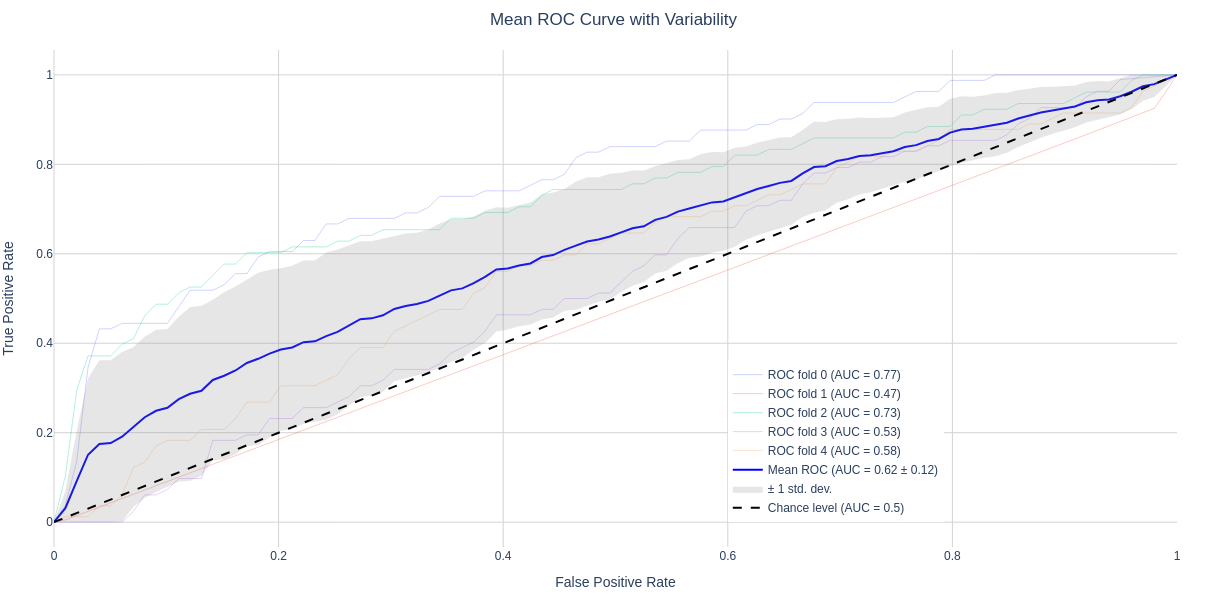

In [396]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for fold, (y_true, y_pred) in enumerate(zip(true_labels, test_predictions)):

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Calculate the mean and standard deviation of the TPRs
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

# Create the plotly figure
fig = go.Figure()

# Add each fold's ROC curve
for i, (tpr, auc_val) in enumerate(zip(tprs, aucs)):
    fig.add_trace(go.Scatter(
        x=mean_fpr, y=tpr,
        mode='lines',
        line=dict(width=1),
        name=f'ROC fold {i} (AUC = {auc_val:.2f})',
        opacity=0.3
    ))

# Add the mean ROC curve
fig.add_trace(go.Scatter(
    x=mean_fpr, y=mean_tpr,
    mode='lines',
    line=dict(color='blue', width=2),
    name=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})'
))

# Add the standard deviation fill
fig.add_trace(go.Scatter(
    x=np.concatenate([mean_fpr, mean_fpr[::-1]]),
    y=np.concatenate([tprs_upper, tprs_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(128, 128, 128, 0.2)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    hoverinfo="skip",
    showlegend=True,
    name='± 1 std. dev.'
))

# Add the chance line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='black', dash='dash'),
    name='Chance level (AUC = 0.5)'
))

# Update layout
fig.update_layout(
    title=dict(text='Mean ROC Curve with Variability', x=0.5),
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.6, y=0.05),
    width=800, height=600,
    #font=dict(family="Times New Roman", size=16),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Add grid lines and adjust axes
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

# Show plot
fig.show()
fig.write_image(os.path.join(figures_dir,"AUC_ROC_Picai."+extension),scale=6)

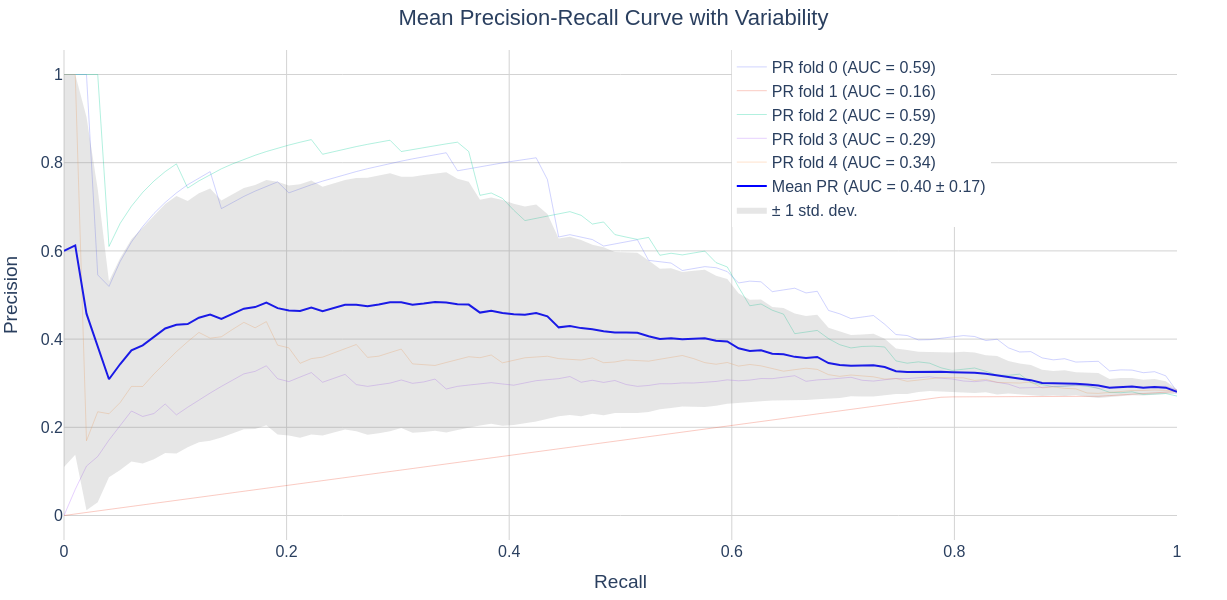

In [397]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, auc


precisions = []
aucs = []
mean_recall = np.linspace(0, 1, 100)

# Simulate multiple folds for the example
for fold, (y_true, y_pred) in enumerate(zip(true_labels, test_predictions)):

    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    aucs.append(pr_auc)

    interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(interp_precision)

# Calculate the mean and standard deviation of the precisions
mean_precision = np.mean(precisions, axis=0)
mean_auc = auc(mean_recall, mean_precision)
std_auc = np.std(aucs)

std_precision = np.std(precisions, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)

# Create the plotly figure
fig = go.Figure()

# Add each fold's Precision-Recall curve
for i, (precision, auc_val) in enumerate(zip(precisions, aucs)):
    fig.add_trace(go.Scatter(
        x=mean_recall, y=precision,
        mode='lines',
        line=dict(width=1),
        name=f'PR fold {i} (AUC = {auc_val:.2f})',
        opacity=0.3
    ))

# Add the mean Precision-Recall curve
fig.add_trace(go.Scatter(
    x=mean_recall, y=mean_precision,
    mode='lines',
    line=dict(color='blue', width=2),
    name=f'Mean PR (AUC = {mean_auc:.2f} ± {std_auc:.2f})'
))

# Add the standard deviation fill
fig.add_trace(go.Scatter(
    x=np.concatenate([mean_recall, mean_recall[::-1]]),
    y=np.concatenate([precisions_upper, precisions_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(128, 128, 128, 0.2)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    hoverinfo="skip",
    showlegend=True,
    name='± 1 std. dev.'
))

# Update layout
fig.update_layout(
    title=dict(text='Mean Precision-Recall Curve with Variability', x=0.5),
    xaxis_title='Recall',
    yaxis_title='Precision',
    legend=dict(x=0.6, y=1),
    width=800, height=600,
    font=dict(size=16),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Add grid lines and adjust axes
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

# Show plot
fig.show()
fig.write_image(os.path.join(figures_dir,"Precision_Recall_Picai."+extension),scale=6)

# Evaluating PICAI with pretrained model

In [16]:
from Prostate_Cancer_TFM.Classification.Dataloader_Picai import Dataloader
from Prostate_Cancer_TFM.Classification.models import EfficientNet_pretrained
import torch
import torchmetrics
import torch.nn.functional as F


 missing cuda symbols while dynamic loading
 cuFile initialization failed


In [17]:
dataloader = Dataloader(path='Prostate_Cancer_TFM/Files/PICAI/partition_1_cv.csv',partition_column="Fold 2")
test_dataloader = dataloader(partition='test')

Loading dataset: 100%|██████████| 298/298 [00:25<00:00, 11.48it/s]


In [18]:
pretrained_weights_path = 'Prostate_Cancer_TFM/Classification/logs/classification/Prostate/05-Jul-2024-10:48:50/models/best-model-weights.pth'
model = EfficientNet_pretrained(model_name = "efficientnet-b7",
                                n_classes = 2, 
                                in_channels_eff = 3,
                                pretrained_weights_path = None)

model.load_state_dict(torch.load(pretrained_weights_path)["state_dict"])

<All keys matched successfully>

In [138]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set the model to evaluation mode

y_pred_picai = []
y_true_picai = []

for data in test_dataloader:
    image, label = data['image'], data['label']
    image = image.to(device)
    label = label.to(device)

    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)  # Apply softmax to get probabilities

    y_pred_picai.extend(probabilities.cpu().numpy())
    y_true_picai.extend(label.cpu().numpy())

# Convert lists to numpy arrays for further processing
y_pred_picai = np.array(y_pred_picai)
y_true_picai = np.array(y_true_picai)

In [150]:
pretrained_predictions = y_pred_picai[:288,1]
non_pretrained_predictions = test_predictions[2]
true_labels = true_labels[2]
# Proceed with the analysis using the subset
pretrained_pred_labels = (pretrained_predictions > 0.5).astype(int)
non_pretrained_pred_labels = (non_pretrained_predictions > 0.5).astype(int)

# Classification reports
pretrained_class_report = classification_report(true_labels, pretrained_pred_labels, output_dict=True)
non_pretrained_class_report = classification_report(true_labels, non_pretrained_pred_labels, output_dict=True)

# Confusion matrices
pretrained_conf_matrix = confusion_matrix(true_labels, pretrained_pred_labels)
non_pretrained_conf_matrix = confusion_matrix(true_labels, non_pretrained_pred_labels)

# ROC curves
fpr_pretrained, tpr_pretrained, _ = roc_curve(true_labels, pretrained_predictions)
roc_auc_pretrained = auc(fpr_pretrained, tpr_pretrained)

fpr_non_pretrained, tpr_non_pretrained, _ = roc_curve(true_labels, non_pretrained_predictions)
roc_auc_non_pretrained = auc(fpr_non_pretrained, tpr_non_pretrained)

# Plot ROC curves
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_pretrained, y=tpr_pretrained,
    mode='lines', name=f'Pre-trained model (AUC = {roc_auc_pretrained:.2f})',
    line=dict(color='darkorange', width=2)
))

fig.add_trace(go.Scatter(
    x=fpr_non_pretrained, y=tpr_non_pretrained,
    mode='lines', name=f'Non-pre-trained model (AUC = {roc_auc_non_pretrained:.2f})',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines', name='Random Chance',
    line=dict(color='navy', width=2, dash='dash')
))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.4, y=0.1),
    width=800, height=600,
    font=dict(size=16),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show()

# Generate precision-recall curves
precision_pretrained, recall_pretrained, _ = precision_recall_curve(true_labels, pretrained_predictions)
auc_precision_recall_pretrained = auc(recall_pretrained, precision_pretrained)

precision_non_pretrained, recall_non_pretrained, _ = precision_recall_curve(true_labels, non_pretrained_predictions)
auc_precision_recall_non_pretrained = auc(recall_non_pretrained, precision_non_pretrained)

# Create the precision-recall curve plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=recall_pretrained, y=precision_pretrained,
    mode='lines', name=f'Pre-trained model (AUC = {auc_precision_recall_pretrained:.2f})',
    line=dict(color='darkorange', width=2)
))

fig.add_trace(go.Scatter(
    x=recall_non_pretrained, y=precision_non_pretrained,
    mode='lines', name=f'Non-pre-trained model (AUC = {auc_precision_recall_non_pretrained:.2f})',
    line=dict(color='blue', width=2)
))

fig.update_layout(
    title='Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    legend=dict(x=0.4, y=0.1),
    width=800, height=600,
    font=dict(size=16),
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show()

# Model Interpretation

In [176]:
from Prostate_Cancer_TFM.Classification.Dataloader import Dataloader
from Prostate_Cancer_TFM.Classification.models import EfficientNet_pretrained
import torch
import torchmetrics
import torch.nn.functional as F
import monai
from tqdm import tqdm
import os

In [152]:
dataloader = Dataloader(path='/home/jaalzate/Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Unified_Derivatives.csv')
test_dataloader = dataloader(partition='val')

Loading dataset: 100%|██████████| 217/217 [00:53<00:00,  4.04it/s]


In [153]:
pretrained_weights_path = 'Prostate_Cancer_TFM/Classification/logs/classification/Prostate/05-Jul-2024-10:48:50/models/best-model-weights.pth'
model = EfficientNet_pretrained(model_name = "efficientnet-b7",
                                n_classes = 2, 
                                in_channels_eff = 3,
                                pretrained_weights_path = None)

model.load_state_dict(torch.load(pretrained_weights_path)["state_dict"])

<All keys matched successfully>

In [398]:
def get_next_im(loader):
    test_data = next(iter(loader))
    #print(test_data["image_meta_dict"]["filename_or_obj"])
    return test_data["image"].to(device), test_data["label"].to(device)


def plot_occlusion_heatmap(im, heatmap):
    plt.subplots(1, 2)
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(im.cpu()))
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow(heatmap)
    plt.colorbar()
    plt.show()

In [399]:
results = [torch.zeros((3, 128, 128, 32)), torch.zeros((3, 128, 128, 32))]
counts = [0, 0]

In [180]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

occ_sens = monai.visualize.OcclusionSensitivity(nn_module=model, mask_size=8, n_batch=64, verbose=False)
with torch.no_grad():    
    for data in tqdm(test_dataloader):
        img, label = data["image"].to(device), data["label"].to(device)
        pred_label = torch.nn.functional.softmax(model(img), dim=1).argmax().item()
        label = label.argmax().item()
        if label == pred_label:
            occ_result, _ = occ_sens(x=img)
            occ_result = occ_result[0, label][None]
            torch.save(occ_result.cpu(), f"Prostate_Cancer_TFM/Classification/sensitivity_maps/class{label}_{os.path.basename(img.meta['filename_or_obj'][0])}")
            results[label] += occ_result.cpu()
            counts[label] += 1

100%|██████████| 217/217 [53:52<00:00, 14.90s/it] 


In [181]:
no_csPCa = results[0] / counts[0]

In [182]:
csPCa = results[1] / counts[1]

In [184]:
torch.save({"no_csPCa": no_csPCa, "csPCa": csPCa}, "Prostate_Cancer_TFM/Classification/Prostate_Cancer_heatmaps_BIMCV.pth")

In [400]:
maps = torch.load("Prostate_Cancer_TFM/Classification/Prostate_Cancer_heatmaps_BIMCV.pth")

## no csPCa

In [406]:
idx=np.random.randint(0,len(test_dataloader))
img, label = (test_dataloader.dataset[idx]['image'].to(device),test_dataloader.dataset[idx]['label'])
print(img.shape, label.shape)
label

torch.Size([3, 128, 128, 32]) torch.Size([2])


tensor([1., 0.])

In [407]:
with torch.no_grad():
    print(torch.nn.functional.softmax(model(img.unsqueeze(0)), dim=1))

metatensor([[0.9014, 0.0986]], device='cuda:0')


In [408]:
no_csPCa = (maps["no_csPCa"] - maps["no_csPCa"].min())/(maps["no_csPCa"].max() - maps["no_csPCa"].min())

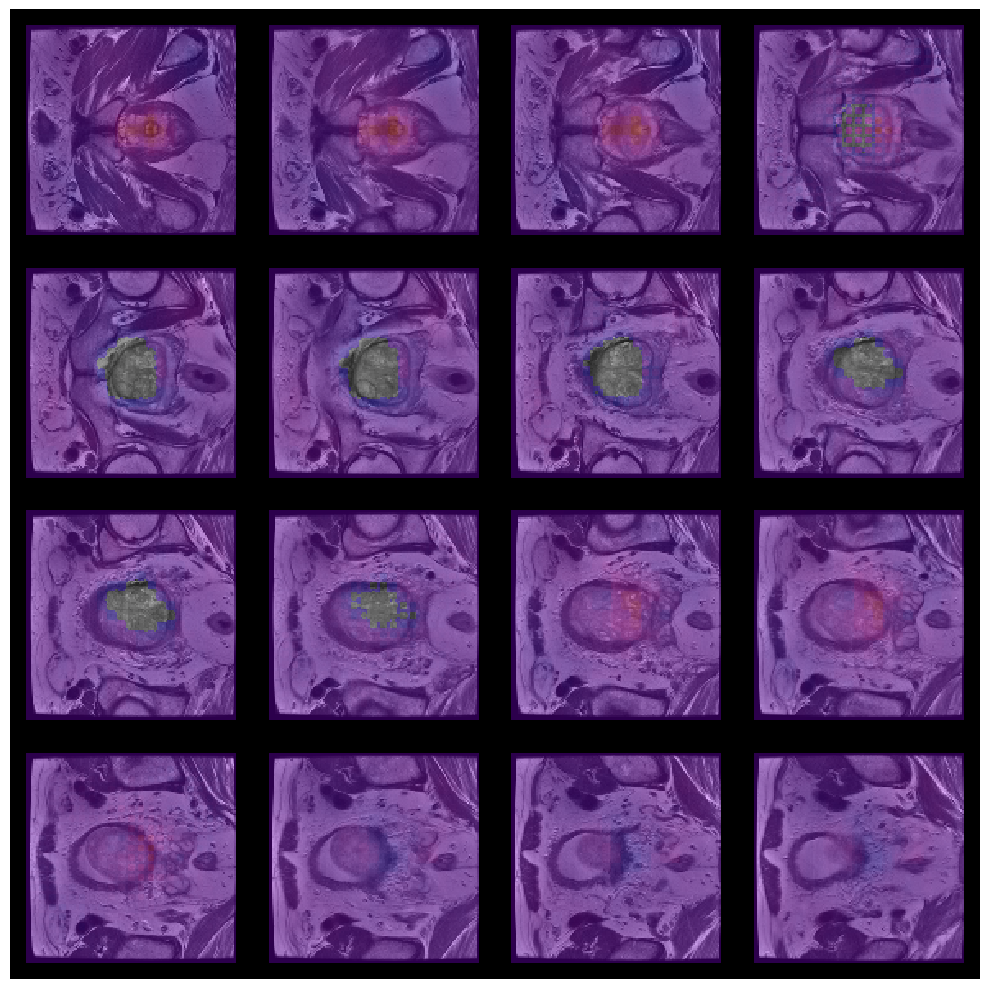

In [409]:
blended = monai.visualize.utils.blend_images(255*img.squeeze(0).cpu()[0:1], 
                                             255*torch.where(no_csPCa.cpu()[0:1] > 0.7, no_csPCa.cpu()[0:1], 0), 
                                             alpha=0.3,
                                             transparent_background=True)
monai.visualize.matshow3d(volume=blended, frame_dim=-1, channel_dim=0, every_n=2, margin=10, show=False)
plt.show()

## csPCa

In [422]:
idx=np.random.randint(0,len(test_dataloader))
img, label = (test_dataloader.dataset[idx]['image'].to(device),test_dataloader.dataset[idx]['label'])
print(img.shape, label.shape)
label

torch.Size([3, 128, 128, 32]) torch.Size([2])


tensor([0., 1.])

In [423]:
with torch.no_grad():
    print(torch.nn.functional.softmax(model(img.unsqueeze(0)), dim=1))

metatensor([[0.0127, 0.9873]], device='cuda:0')


In [424]:
csPCa = (maps["csPCa"] - maps["csPCa"].min())/(maps["csPCa"].max() - maps["csPCa"].min())

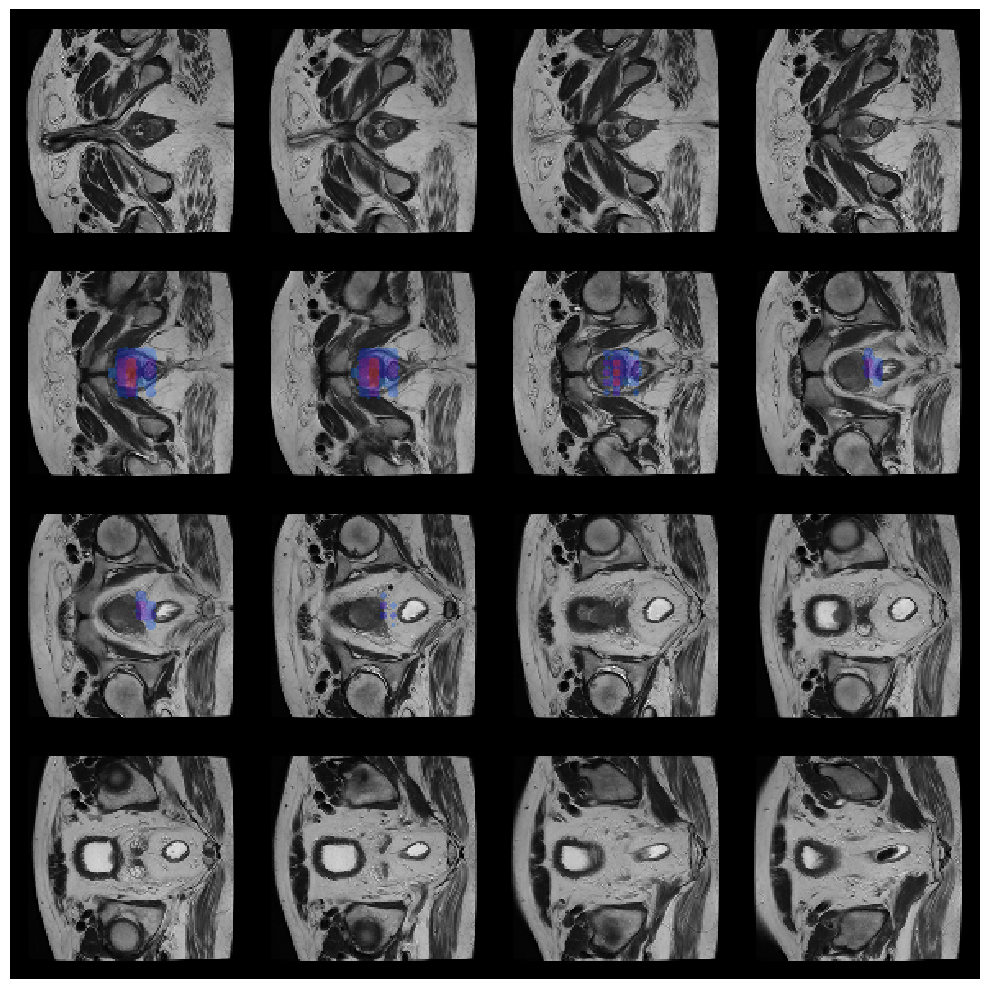

In [428]:
blended = monai.visualize.utils.blend_images(255*img.squeeze(0).cpu()[0:1], 
                                             255*torch.where(csPCa.cpu()[0:1] > 0.6, csPCa.cpu()[0:1], 0), 
                                             alpha=0.3,
                                             transparent_background=True)
monai.visualize.matshow3d(volume=blended, frame_dim=-1, channel_dim=0, every_n=2, margin=10, show=False)
plt.savefig(os.path.join(figures_dir,"model_interpretation."+extension), dpi=500, bbox_inches='tight')
plt.show()

## Get Individual heatmap

In [364]:
idx=np.random.randint(0,len(test_dataloader))
img, label = (test_dataloader.dataset[idx]['image'].to(device),test_dataloader.dataset[idx]['label'])
print(img.shape, label.shape)
label

torch.Size([3, 128, 128, 32]) torch.Size([2])


tensor([0., 1.])

In [365]:
heatmap = torch.load(f"Prostate_Cancer_TFM/Classification/sensitivity_maps/class{label.argmax().item()}_{os.path.basename(img.meta['filename_or_obj'])}")

In [366]:
heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())

In [367]:
heatmap.shape

torch.Size([1, 128, 128, 32])

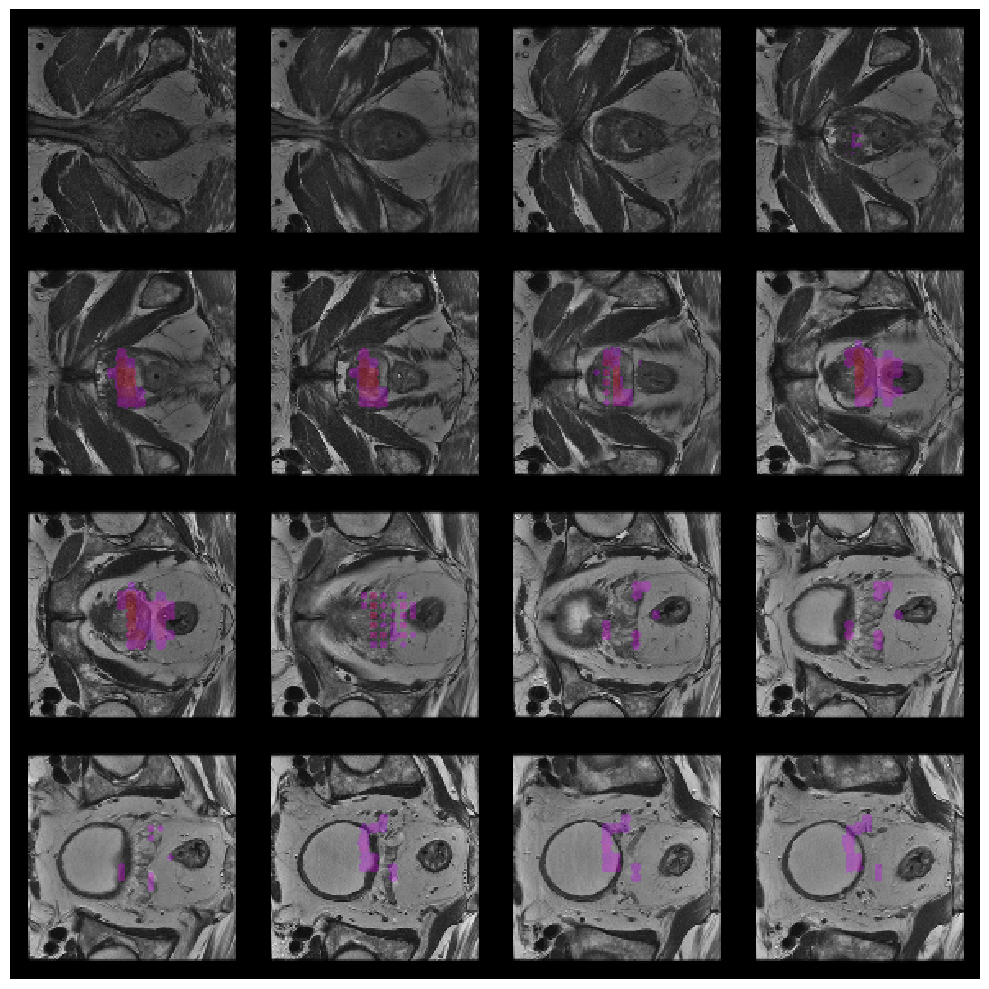

In [370]:
blended = monai.visualize.utils.blend_images(255*img.squeeze(0).cpu()[0:1], 
                                             255*torch.where(heatmap.cpu()[0:1] > 0.8, heatmap.cpu()[0:1], 0), 
                                             alpha=0.3,
                                             transparent_background=True)
monai.visualize.matshow3d(volume=blended, frame_dim=-1, channel_dim=0, every_n=2, margin=10, show=False)
plt.show()

In [334]:
import nibabel as nib

ras_pos = (255*blended.permute(1,2,3,0)).astype(torch.uint8).cpu().numpy()
shape_3d = ras_pos.shape[0:3]
rgb_dtype = np.dtype([('R', 'u1'), ('G', 'u1'), ('B', 'u1')])
ras_pos = ras_pos.copy().view(dtype=rgb_dtype).reshape(shape_3d)  # copy used to force fresh internal structure
ni_img = nib.Nifti1Image(ras_pos, img.affine)
nib.save(ni_img, "Prostate_Cancer_TFM/Classification/resized.nii.gz")